In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import ariel_load
import ariel_model
import ariel_simple
import copy
import tqdm
kgs.sanity_checks_active = True
kgs.sanity_checks_without_errors = True

local


In [2]:
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

# t = []
# for ind in range(len(train_data)):
#     if ind not in [999, 114, 21, 647, 146, 147, 897, 364, 553, 1013, 264, 90, 931, 697, 501, 288, 689, 892, 64, 251, 298, 876, 886, 494, 220, 398, 16, 727, 277, 1067, 1021, 240, 1002, 809, 460, 665, 679, 729, 1049, 989, 383, 531, 305, 1025, 401, 838, 99, 163, 1055, 695, 894, 750, 111, 418, 328, 403, 680, 171, 683, 877, 761, 765, 956, 119, 618, 216, 60, 9, 0, 159, 1091, 112, 422, 885, 229, 140, 568, 787, 11, 686, 563, 53, 1063, 636, 107, 737, 700, 795, 646, 1022, 712, 375, 333, 516, 185, 441, 656, 237, 262, 306, 408, 992, 893, 869, 954, 978, 285, 487, 601, 642, 245, 72, 484, 582, 1065, 933, 129, 591, 476, 393, 430, 784, 373, 722, 965, 263, 366, 379, 807, 479, 570, 349, 760, 782, 184, 1030, 998, 546, 337, 888, 477, 547, 23, 371, 678, 311, 669, 440, 505, 196, 720, 425, 75, 174, 44, 969, 100, 78, 120, 475, 578, 361, 536, 653, 688, 810, 1058, 213, 294, 96, 1031, 758, 708, 733, 362, 135, 734, 847, 485, 619, 17, 709, 161, 823, 826, 677, 152, 794, 1028, 812, 739, 1001, 907, 19, 879, 698, 202, 192, 793, 1024, 467, 803, 870, 66, 178, 416, 801, 816, 658, 592, 249, 439, 663, 160, 1047, 492, 786, 74, 604, 993, 219, 673, 593, 59, 836, 1088, 1075, 325, 588, 208, 151, 961, 913, 873, 321, 740, 951, 1066, 514, 271, 799, 137, 206, 675, 518, 724, 508, 341, 735, 387, 555, 864, 935, 538, 815, 198, 180, 549, 820, 327, 93, 899, 390, 667, 117, 903, 1057, 906, 701, 87, 909, 470, 421, 449, 290, 47, 88, 641, 783, 270, 754, 128, 703, 404, 845, 1004, 385, 314, 842, 1027, 606, 378, 228, 257, 101, 338, 193, 1000, 829, 519, 529, 156, 209, 13, 497, 1046, 438, 230, 624, 704, 970, 496, 164, 772, 70, 692, 384, 736, 824, 1094, 136, 948, 1051, 639, 901, 307, 912, 650, 1054, 696, 279, 169, 199, 22, 1042, 269, 201, 796, 278, 1036, 941, 891, 396, 716, 410, 920, 575, 255, 778, 1081, 925, 562, 963, 372, 367, 212, 567, 1038, 472, 571, 730, 153, 916, 144, 942, 442, 1095, 613, 1092, 713, 92, 1079, 910, 166, 89, 629, 2, 884, 177, 651, 447, 702, 655, 344, 203, 725, 412, 319, 622, 602, 572, 108, 448, 27, 217, 323, 461, 149, 865, 975, 18, 83, 875, 973, 530, 62, 732, 145, 603, 915, 902, 950, 431, 972, 97, 959, 693, 415, 246, 839, 874, 1093, 343, 28, 905, 286, 86, 445, 738, 871, 611, 962, 503, 806, 856, 292, 468, 256, 539, 122, 348, 459, 515, 707, 374, 466, 1015, 493, 825, 881, 1084, 615, 46, 31, 58, 427, 576, 500, 747, 797, 483, 790, 406, 690, 889, 197, 79, 805, 977, 605, 517, 155, 682, 559, 581, 423, 315, 284, 76, 830, 310, 313, 7, 946, 513, 584, 347, 560, 1006, 932, 649, 1052, 424, 138, 26, 247, 749, 640, 955, 533, 580, 499, 1034, 666, 200, 785, 1040, 645, 1041, 545, 317, 345, 30, 543, 952, 259, 8, 464, 296, 148, 369, 187, 995, 242, 880, 426, 322, 757, 1087, 607, 450, 743, 14, 167, 265, 1008, 131, 69, 471, 55, 126, 1062, 91, 481, 831, 486, 623, 726, 985, 35, 282, 173, 346, 186, 1043, 37, 990, 1048, 813, 670, 746, 1017, 363, 252, 504, 612, 32, 718, 569, 326, 768, 866, 1064, 110, 631, 420, 332, 142, 20, 643, 1016, 742, 443, 984, 986, 1069, 828, 551, 510, 316, 234, 921, 261, 744, 764, 851, 154, 859, 561, 1020, 583, 253, 940, 821, 684, 254, 832, 699, 846, 918, 50, 949, 565, 172, 81, 473, 42, 506, 1053, 896, 634, 488, 706, 774, 113, 710, 352, 376, 526, 1039, 857, 1086, 304, 862, 1050, 1083, 218, 957, 48, 127, 102, 280, 51, 895, 359, 858, 238, 1090, 324, 105, 930, 776, 210, 1071, 632, 741, 444, 405, 944, 339, 791, 964, 971, 745, 189, 370, 293, 224, 1033, 437, 960, 241, 759, 236, 115, 1023, 861, 301, 509, 586, 103, 190, 715, 239, 451, 205, 77, 150, 434, 104, 409, 756, 157, 927, 853, 924, 1056, 121, 223, 250, 318, 56, 542, 1, 751, 600, 608, 926, 994, 878, 1011, 226, 585, 635, 182, 436, 541, 522, 266, 482, 227, 132, 819, 911, 779, 798, 388, 134, 1098, 287, 162, 15, 1035, 52, 65, 395, 94, 773, 843, 1096, 934, 685, 480, 428, 590, 235, 867, 130, 728, 175, 433, 243, 106, 868, 399, 1029, 411, 456, 633, 616, 368, 281, 674, 900, 637, 498, 1072, 827, 57, 188, 143, 664, 354, 991, 158, 817, 534, 351, 392, 495, 25, 630, 380, 24, 676, 802, 1007, 231, 29, 947, 1018, 1073, 248, 232, 939, 863, 850, 691, 587, 356, 1085, 489, 33, 4, 407, 195, 943, 1070, 54, 579, 609, 835, 917, 353, 457, 520, 537, 748, 833, 837, 276, 469, 525, 980, 1019, 40, 1089, 465, 771, 272, 331, 80, 966, 6, 299, 852, 511, 808, 233, 68, 781, 67, 919, 260, 413, 769, 302, 654, 139, 183, 303, 557, 360, 532, 308, 41, 1009, 890, 453, 694, 458, 723, 12, 979, 1082, 312, 714, 168, 540, 49, 620, 860, 381, 717, 267, 594, 804, 1044, 377, 770, 141, 854, 336, 342, 898, 400, 883, 814, 84, 626, 625, 659, 752, 507, 61, 904, 391, 268, 211, 512, 221, 283, 687, 124, 3, 116, 638, 958, 614, 214, 1074, 179, 988, 953, 454, 844, 822, 98, 1037, 1060, 660, 358, 222, 181, 573, 258, 340, 382, 1014, 767, 1026, 550, 225, 937, 45, 291, 355, 191, 194, 922, 762, 300, 320, 766, 274, 474, 389, 661, 657, 295, 1068, 564, 1059, 10, 502, 711, 908, 297, 1078, 841, 1061, 165, 628, 544, 527, 789, 95, 478, 82, 71, 719, 753, 244, 981, 419, 983, 402, 929, 800, 763, 455, 668, 968, 974, 662, 914, 528, 34, 840, 617, 463, 599, 435, 535, 207, 36, 491, 63, 597, 627, 432, 446, 621, 462, 610, 644, 574, 882, 589, 275, 133, 386, 1005, 872, 125, 566, 5, 523, 524, 123, 452, 834, 1076, 1032, 777, 938, 848, 681, 43, 554, 204, 928, 976, 982, 577, 775, 987, 996, 923, 671, 170, 731, 855, 397, 109, 755, 1080, 705, 38]:
#         t.append(train_data[ind])
# train_data = t

train_data = train_data

In [3]:
loaders = ariel_load.default_loaders()
importlib.reload(ariel_simple)
# loaders[0].cache_steps = []
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
model = ariel_simple.SimpleModel()
model.unlock_t0 = True
model.new_solver = True
for ii in range(2):
    model.loaders[ii].apply_pixel_corrections.remove_last_frame = True
    model.loaders[ii].apply_pixel_corrections.new_cosmic_ray_removal = True
    model.loaders[ii].apply_time_binning.add_last_frame=True
    #model.loaders[ii].apply_pixel_corrections.cosmic_ray_threshold = 10
model = ariel_simple.SimpleModelChainer(model=model)
model.train(kgs.load_all_train_data())

In [4]:
kgs.debugging_mode = 2
model.infer(train_data+test_data);
# for d in tqdm.tqdm(train_data+test_data):
#     dd = copy.deepcopy(d)
#     for t in dd.transits:
#         t.load_to_step(5,dd,loaders)
    #kgs.print_sanity_checks()
# model = ariel_model.baseline_model()
# data = train_data
# model.train(data)
# inferred_data = model.infer(data)
# kgs.score_metric(inferred_data, data)

Inferring:   3%|██▍                                                                   | 38/1100 [00:56<25:48,  1.46s/it]

Old solver/alternative transit parameters fallback for planet id 152245846


Inferring:   4%|██▍                                                                   | 39/1100 [00:59<26:33,  1.50s/it]

Old solver/alternative transit parameters fallback for planet id 155501234


Inferring:   6%|████▎                                                                 | 68/1100 [01:59<26:14,  1.53s/it]

Old solver/alternative transit parameters fallback for planet id 229071424
Attempting chop


Inferring:   6%|████▍                                                                 | 69/1100 [02:11<35:18,  2.06s/it]

Chop used on planet id 229071424


Inferring:   7%|████▋                                                                 | 73/1100 [02:14<31:10,  1.82s/it]

Old solver/alternative transit parameters fallback for planet id 237793157


Inferring:   8%|█████▍                                                                | 85/1100 [02:42<33:17,  1.97s/it]

Old solver/alternative transit parameters fallback for planet id 291916399


Inferring:  10%|██████▊                                                              | 109/1100 [03:11<22:11,  1.34s/it]

Old solver/alternative transit parameters fallback for planet id 401682767


Inferring:  11%|███████▍                                                             | 118/1100 [03:23<21:54,  1.34s/it]

Old solver/alternative transit parameters fallback for planet id 450197552


Inferring:  15%|██████████▋                                                          | 170/1100 [04:41<19:01,  1.23s/it]

Old solver/alternative transit parameters fallback for planet id 656960256


Inferring:  16%|███████████                                                          | 176/1100 [04:50<19:47,  1.29s/it]

Old solver/alternative transit parameters fallback for planet id 691402002


Inferring:  20%|█████████████▍                                                       | 215/1100 [05:50<20:48,  1.41s/it]

Old solver/alternative transit parameters fallback for planet id 824937040


Inferring:  25%|█████████████████                                                    | 273/1100 [07:04<17:58,  1.30s/it]

Old solver/alternative transit parameters fallback for planet id 1053204615


Inferring:  28%|███████████████████▍                                                 | 309/1100 [07:49<16:52,  1.28s/it]

Old solver/alternative transit parameters fallback for planet id 1196027041


Inferring:  30%|████████████████████▋                                                | 329/1100 [08:16<16:18,  1.27s/it]

Old solver/alternative transit parameters fallback for planet id 1267010874


Inferring:  30%|████████████████████▋                                                | 330/1100 [08:23<20:03,  1.56s/it]

Old solver/alternative transit parameters fallback for planet id 1267583899


Inferring:  30%|█████████████████████                                                | 335/1100 [08:33<20:59,  1.65s/it]

Old solver/alternative transit parameters fallback for planet id 1293223638


Inferring:  32%|█████████████████████▉                                               | 350/1100 [08:52<17:34,  1.41s/it]

Old solver/alternative transit parameters fallback for planet id 1329906799


Inferring:  32%|██████████████████████▍                                              | 357/1100 [09:02<17:28,  1.41s/it]

Old solver/alternative transit parameters fallback for planet id 1349926825
Attempting chop
Old solver/alternative transit parameters fallback for planet id 1349926825
Old solver/alternative transit parameters fallback for planet id 1349926825


Inferring:  33%|██████████████████████▉                                              | 365/1100 [09:32<26:04,  2.13s/it]

Old solver/alternative transit parameters fallback for planet id 1370040003


Inferring:  36%|████████████████████████▋                                            | 394/1100 [10:13<17:34,  1.49s/it]

Old solver/alternative transit parameters fallback for planet id 1475386345


Inferring:  36%|████████████████████████▉                                            | 397/1100 [10:18<17:52,  1.53s/it]

Old solver/alternative transit parameters fallback for planet id 1485093118


Inferring:  38%|█████████████████████████▉                                           | 414/1100 [10:40<15:28,  1.35s/it]

Old solver/alternative transit parameters fallback for planet id 1547333761
Attempting chop
Old solver/alternative transit parameters fallback for planet id 1547333761


Inferring:  38%|██████████████████████████                                           | 415/1100 [10:50<20:15,  1.78s/it]

Chop used on planet id 1547333761


Inferring:  38%|██████████████████████████▏                                          | 417/1100 [10:51<19:05,  1.68s/it]

Old solver/alternative transit parameters fallback for planet id 1554618542


Inferring:  45%|██████████████████████████████▋                                      | 490/1100 [12:20<09:46,  1.04it/s]

Old solver/alternative transit parameters fallback for planet id 1834181716


Inferring:  50%|██████████████████████████████████▎                                  | 548/1100 [13:22<09:38,  1.05s/it]

Old solver/alternative transit parameters fallback for planet id 2069619536


Inferring:  50%|██████████████████████████████████▋                                  | 552/1100 [13:32<12:14,  1.34s/it]

Old solver/alternative transit parameters fallback for planet id 2074730139


Inferring:  51%|██████████████████████████████████▉                                  | 556/1100 [13:40<12:52,  1.42s/it]

Old solver/alternative transit parameters fallback for planet id 2097642218


Inferring:  51%|███████████████████████████████████                                  | 558/1100 [13:46<14:22,  1.59s/it]

Old solver/alternative transit parameters fallback for planet id 2101537217


Inferring:  54%|█████████████████████████████████████▎                               | 595/1100 [14:31<10:48,  1.29s/it]

Old solver/alternative transit parameters fallback for planet id 2254664280


Inferring:  54%|█████████████████████████████████████▍                               | 596/1100 [15:23<32:15,  3.84s/it]

Old solver/alternative transit parameters fallback for planet id 2259395627


Inferring:  54%|█████████████████████████████████████▌                               | 598/1100 [15:31<32:06,  3.84s/it]

Old solver/alternative transit parameters fallback for planet id 2264735129


Inferring:  59%|████████████████████████████████████████▋                            | 648/1100 [16:56<16:22,  2.17s/it]

Old solver/alternative transit parameters fallback for planet id 2484032786


Inferring:  59%|████████████████████████████████████████▉                            | 652/1100 [17:03<15:41,  2.10s/it]

Old solver/alternative transit parameters fallback for planet id 2495453637


Inferring:  61%|██████████████████████████████████████████                           | 671/1100 [17:28<11:07,  1.56s/it]

Old solver/alternative transit parameters fallback for planet id 2558852732


Inferring:  61%|██████████████████████████████████████████▏                          | 672/1100 [17:34<12:38,  1.77s/it]

Old solver/alternative transit parameters fallback for planet id 2562716556


Inferring:  64%|████████████████████████████████████████████▏                        | 705/1100 [18:19<08:59,  1.37s/it]

Old solver/alternative transit parameters fallback for planet id 2701163276


Inferring:  66%|█████████████████████████████████████████████▏                       | 721/1100 [18:36<07:16,  1.15s/it]

Old solver/alternative transit parameters fallback for planet id 2760210399


Inferring:  66%|█████████████████████████████████████████████▊                       | 731/1100 [18:54<08:37,  1.40s/it]

Old solver/alternative transit parameters fallback for planet id 2835583104


Inferring:  69%|███████████████████████████████████████████████▎                     | 755/1100 [19:34<08:13,  1.43s/it]

Old solver/alternative transit parameters fallback for planet id 2973039767


Inferring:  71%|████████████████████████████████████████████████▉                    | 780/1100 [19:57<05:25,  1.02s/it]

Old solver/alternative transit parameters fallback for planet id 3062170297


Inferring:  72%|█████████████████████████████████████████████████▍                   | 788/1100 [20:24<08:58,  1.73s/it]

Old solver/alternative transit parameters fallback for planet id 3098975946


Inferring:  72%|█████████████████████████████████████████████████▋                   | 792/1100 [20:32<09:05,  1.77s/it]

Old solver/alternative transit parameters fallback for planet id 3126879162


Inferring:  74%|██████████████████████████████████████████████████▊                  | 811/1100 [21:17<08:40,  1.80s/it]

Old solver/alternative transit parameters fallback for planet id 3188116178


Inferring:  74%|███████████████████████████████████████████████████▎                 | 818/1100 [21:26<07:37,  1.62s/it]

Old solver/alternative transit parameters fallback for planet id 3206727630


Inferring:  77%|█████████████████████████████████████████████████████▎               | 849/1100 [22:03<04:50,  1.16s/it]

Old solver/alternative transit parameters fallback for planet id 3317944304


Inferring:  78%|█████████████████████████████████████████████████████▋               | 855/1100 [22:21<06:32,  1.60s/it]

Old solver/alternative transit parameters fallback for planet id 3344833436


Inferring:  81%|███████████████████████████████████████████████████████▋             | 887/1100 [23:16<06:40,  1.88s/it]

Old solver/alternative transit parameters fallback for planet id 3469305332


Inferring:  85%|██████████████████████████████████████████████████████████▋          | 936/1100 [24:22<03:16,  1.20s/it]

Old solver/alternative transit parameters fallback for planet id 3653339152


Inferring:  86%|███████████████████████████████████████████████████████████▎         | 945/1100 [24:36<03:19,  1.29s/it]

Old solver/alternative transit parameters fallback for planet id 3679528633


Inferring:  88%|████████████████████████████████████████████████████████████▋        | 967/1100 [25:16<03:17,  1.49s/it]

Old solver/alternative transit parameters fallback for planet id 3786449677
Attempting chop
Old solver/alternative transit parameters fallback for planet id 3786449677
Old solver/alternative transit parameters fallback for planet id 3786449677


Inferring:  91%|██████████████████████████████████████████████████████████████▌      | 997/1100 [26:01<02:29,  1.46s/it]

Old solver/alternative transit parameters fallback for planet id 3884695798
Attempting chop
Old solver/alternative transit parameters fallback for planet id 3884695798


Inferring:  91%|██████████████████████████████████████████████████████████████▌      | 998/1100 [26:18<03:44,  2.20s/it]

Chop used on planet id 3884695798


Inferring:  91%|██████████████████████████████████████████████████████████████      | 1003/1100 [26:22<03:05,  1.92s/it]

Old solver/alternative transit parameters fallback for planet id 3928265625
Attempting chop
Old solver/alternative transit parameters fallback for planet id 3928265625


Inferring:  91%|██████████████████████████████████████████████████████████████      | 1004/1100 [26:45<04:44,  2.97s/it]

Chop used on planet id 3928265625


Inferring:  92%|██████████████████████████████████████████████████████████████▍     | 1010/1100 [26:53<03:45,  2.50s/it]

Old solver/alternative transit parameters fallback for planet id 3955853901


Inferring:  92%|██████████████████████████████████████████████████████████████▌     | 1012/1100 [26:57<03:38,  2.48s/it]

Old solver/alternative transit parameters fallback for planet id 3965882786


Inferring:  95%|████████████████████████████████████████████████████████████████▌   | 1045/1100 [27:47<01:23,  1.52s/it]

Old solver/alternative transit parameters fallback for planet id 4087358670


Inferring:  98%|██████████████████████████████████████████████████████████████████▌ | 1077/1100 [28:33<00:35,  1.53s/it]

Old solver/alternative transit parameters fallback for planet id 4220529965


Inferring:  98%|██████████████████████████████████████████████████████████████████▊ | 1080/1100 [28:40<00:31,  1.60s/it]

Old solver/alternative transit parameters fallback for planet id 4232767776


Inferring: 100%|███████████████████████████████████████████████████████████████████▊| 1097/1100 [29:26<00:06,  2.05s/it]

Old solver/alternative transit parameters fallback for planet id 4293108648


Inferring: 100%|████████████████████████████████████████████████████████████████████| 1100/1100 [29:31<00:00,  1.61s/it]


In [5]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


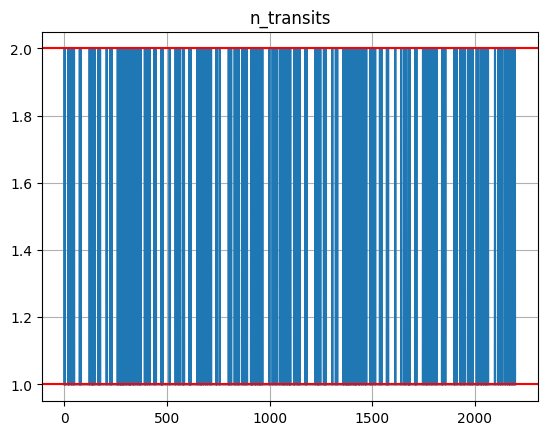

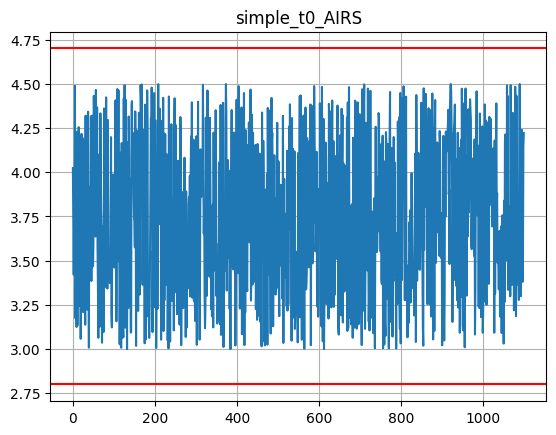

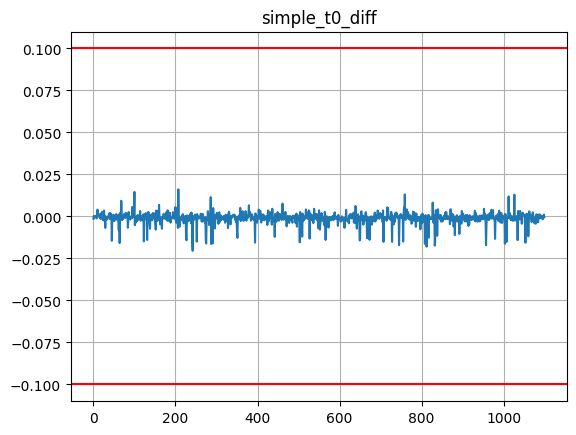

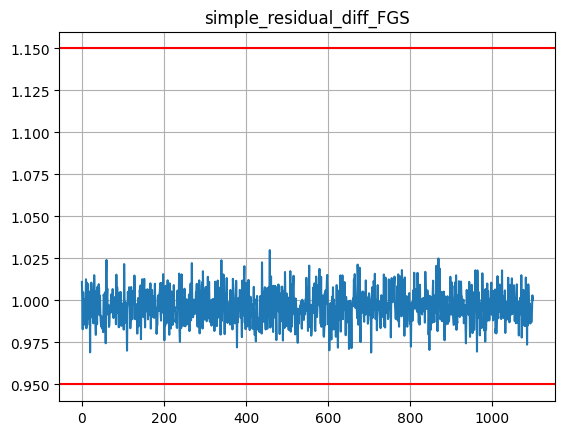

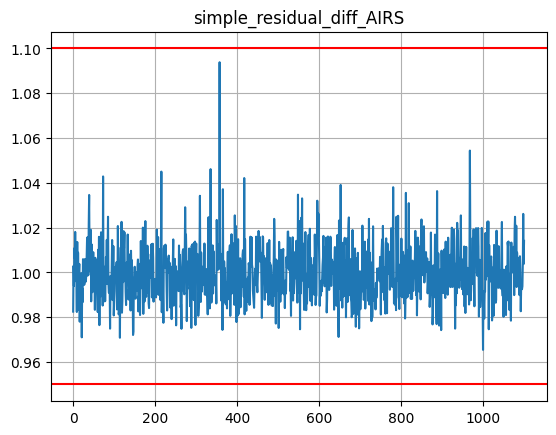

In [6]:
kgs.plot_sanity_checks()

In [7]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [8]:
inds=np.argsort(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[:1099])
inds[-1], kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[inds[-1]]

#print(repr(inds[-50].tolist()))

(357, 1.0938592548598771)

In [9]:
#train_data = kgs.load_all_train_data()[:980]

1.0544158490018611
1.0050679732359873
967


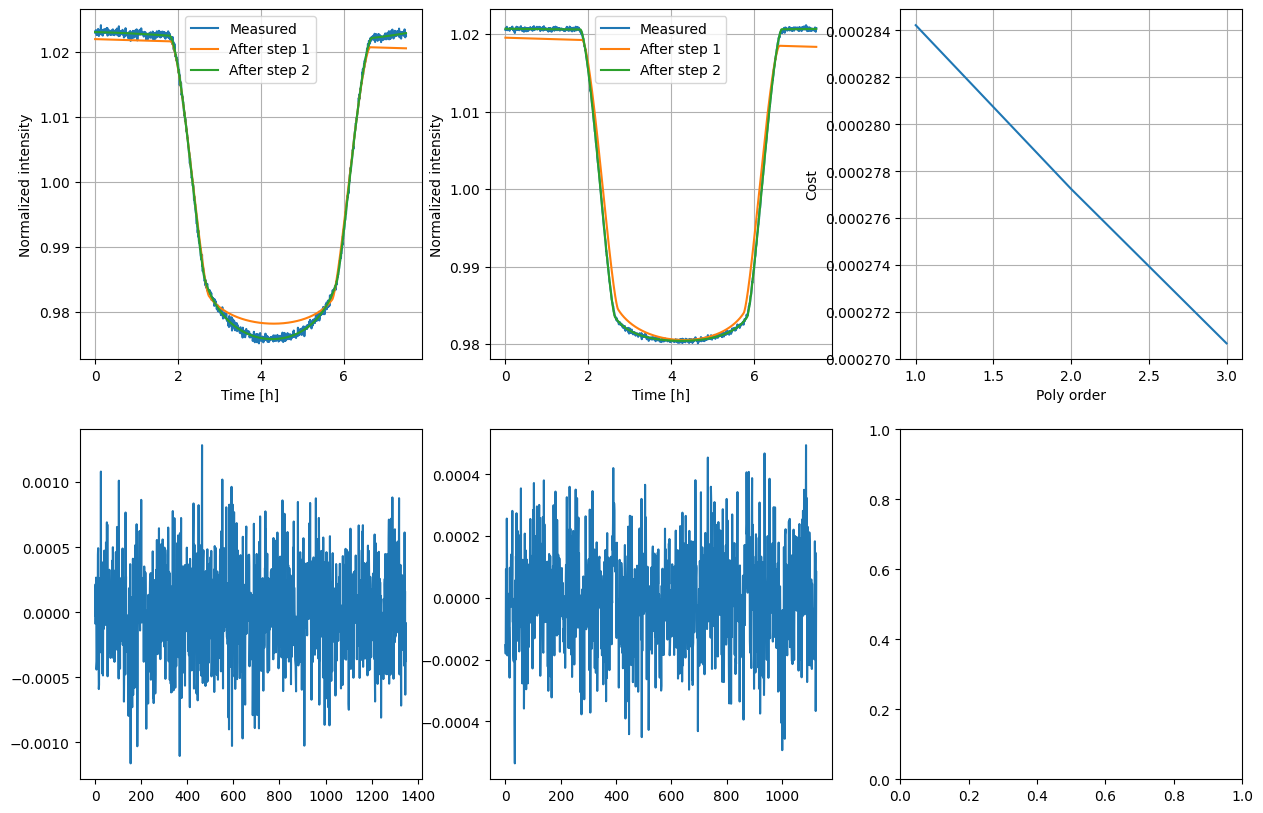

1.0544158490018611
1.0050679732359873


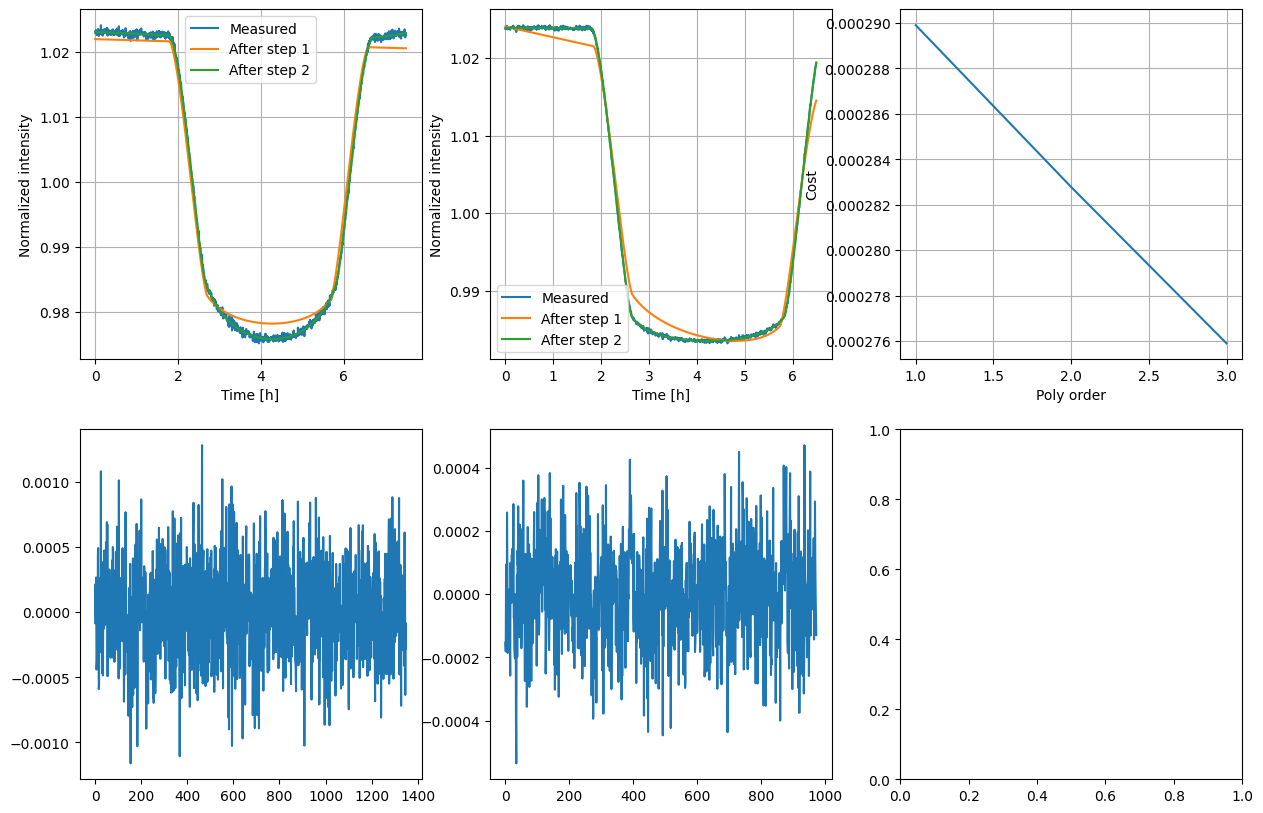

1.052314609315152
1.0049528265151497


In [10]:
# (old inds)
# -1, -2: bad new, good old
# -3, -5, -6: right side issue
# -8: left side issue
# -4: transit start issue
# -7: no visible defect
importlib.reload(ariel_simple)
importlib.reload(ariel_load)
kgs.debugging_mode = 2
# model=ariel_simple.SimpleModel()
# model.unlock_t0 = True
# model.train(train_data)
mm = copy.deepcopy(model)
mm = model.model

#155501234
#ind = np.argwhere(np.array([d.planet_id for d in train_data])==237793157)[0][0]
ind = inds[-2]
#ind=29
print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[ind])
print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[ind])
print(ind)
d = copy.deepcopy(train_data[ind])
mm.new_solver=True
#model.loaders[0].cache_steps = []
mm.do_plots = True
#model.weights = [1,1]
dd=mm.infer([d])
# #print(dd[0].diagnostics['transit_params'])
print(dd[0].diagnostics['simple_residual_diff_AIRS'])
print(dd[0].diagnostics['simple_residual_diff_FGS'])
d = copy.deepcopy(train_data[ind])
#mm.new_solver=False
# model.loaders[0].apply_pixel_corrections.remove_last_frame = True
# model.loaders[1].apply_pixel_corrections.remove_last_frame = True
# for ii in range(2):
#     model.loaders[ii].apply_pixel_corrections.new_cosmic_ray_removal = True
#     model.loaders[ii].apply_time_binning.add_last_frame=True
#     model.loaders[ii].apply_pixel_corrections.cosmic_ray_threshold = 10
#     #model.loaders[ii].apply_pixel_corrections.new_cosmic_ray_removal = True
#     #model.loaders[1].apply_pixel_corrections.cosmic_ray_threshold = 10
# #model.loaders[1].apply_pixel_corrections.new_cosmic_ray_removal = False  
# model.loaders[0].cache_steps = []
# model.weights = [1,1]
#d.transit_params = train_data[0].transit_params
d.load_to_step(5, model.loaders)
NN=150
d.transits[0].data[1].data = d.transits[0].data[1].data[:-NN,...]
d.transits[0].data[1].times = d.transits[0].data[1].times[:-NN,...]
d.transits[0].data[1].time_intervals = d.transits[0].data[1].time_intervals[:-NN,...]
# d.transits[0].data[1].data = d.transits[0].data[1].data[NN:,...]
# d.transits[0].data[1].times = d.transits[0].data[1].times[NN:,...]
# d.transits[0].data[1].time_intervals = d.transits[0].data[1].time_intervals[NN:,...]
dd=mm.infer([d])
#print(dd[0].diagnostics['transit_params'])
print(dd[0].diagnostics['simple_residual_diff_AIRS'])
print(dd[0].diagnostics['simple_residual_diff_FGS'])
# d = copy.deepcopy(train_data[ind])
# d.transit_params = train_data[1].transit_params
# #model.weights = [1,100]
# dd=model.infer([d])
# model.do_plots = False
# #print(dd[0].diagnostics['transit_params'])
# print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[-1])
# print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[-1])
# #model.weights = [100,1]
# #dd=model.infer([d])
# #print(dd[0].diagnostics['transit_params'])
# model.do_plots=False
# print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[-1])
# print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[-1])
# #

In [11]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


0.6810998450533203
-4.819270923511422
-5.486130189624602


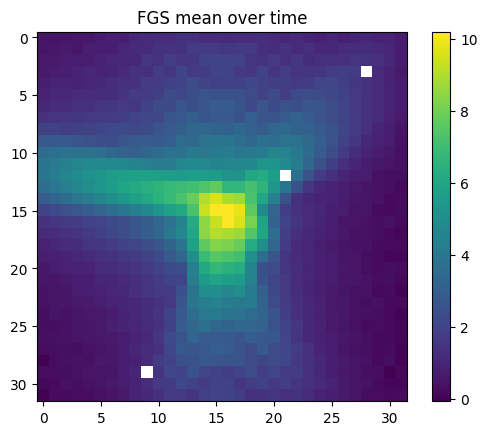

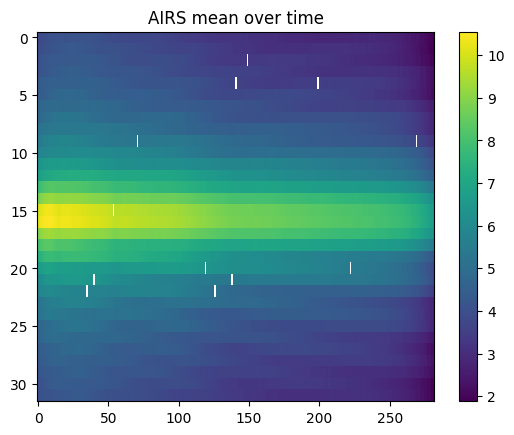

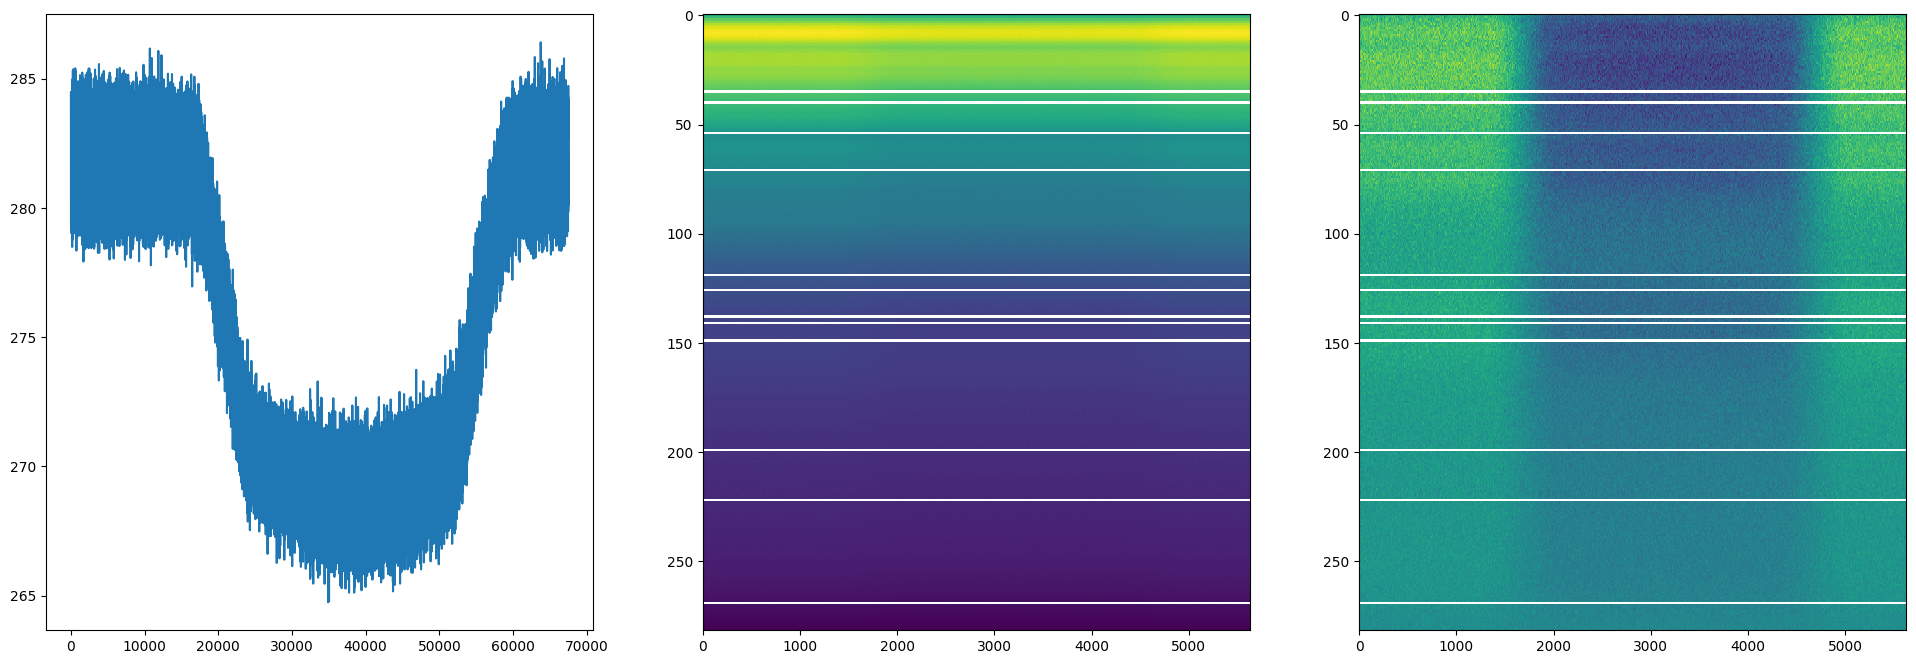

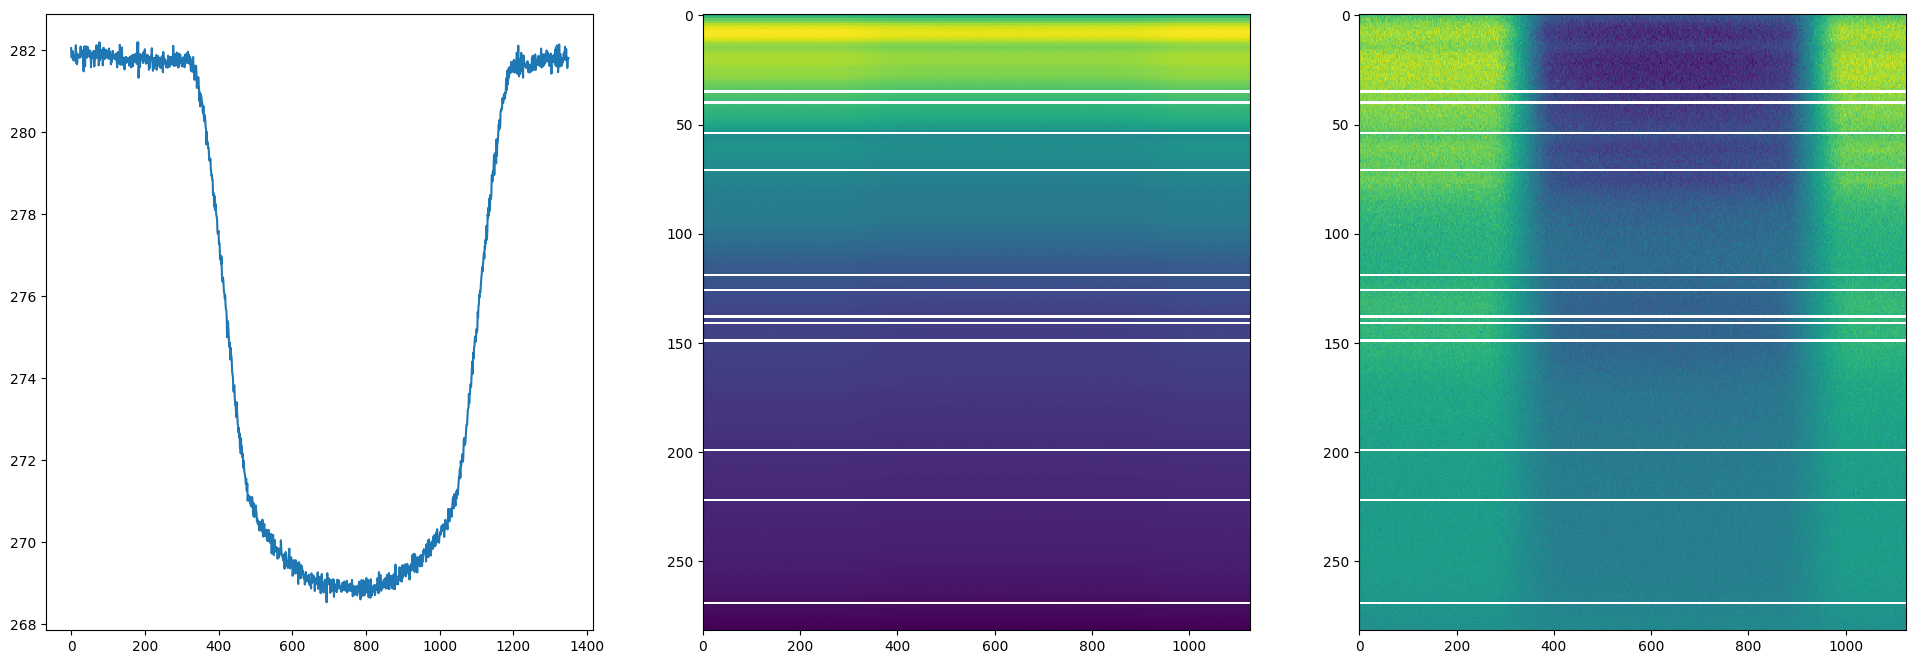

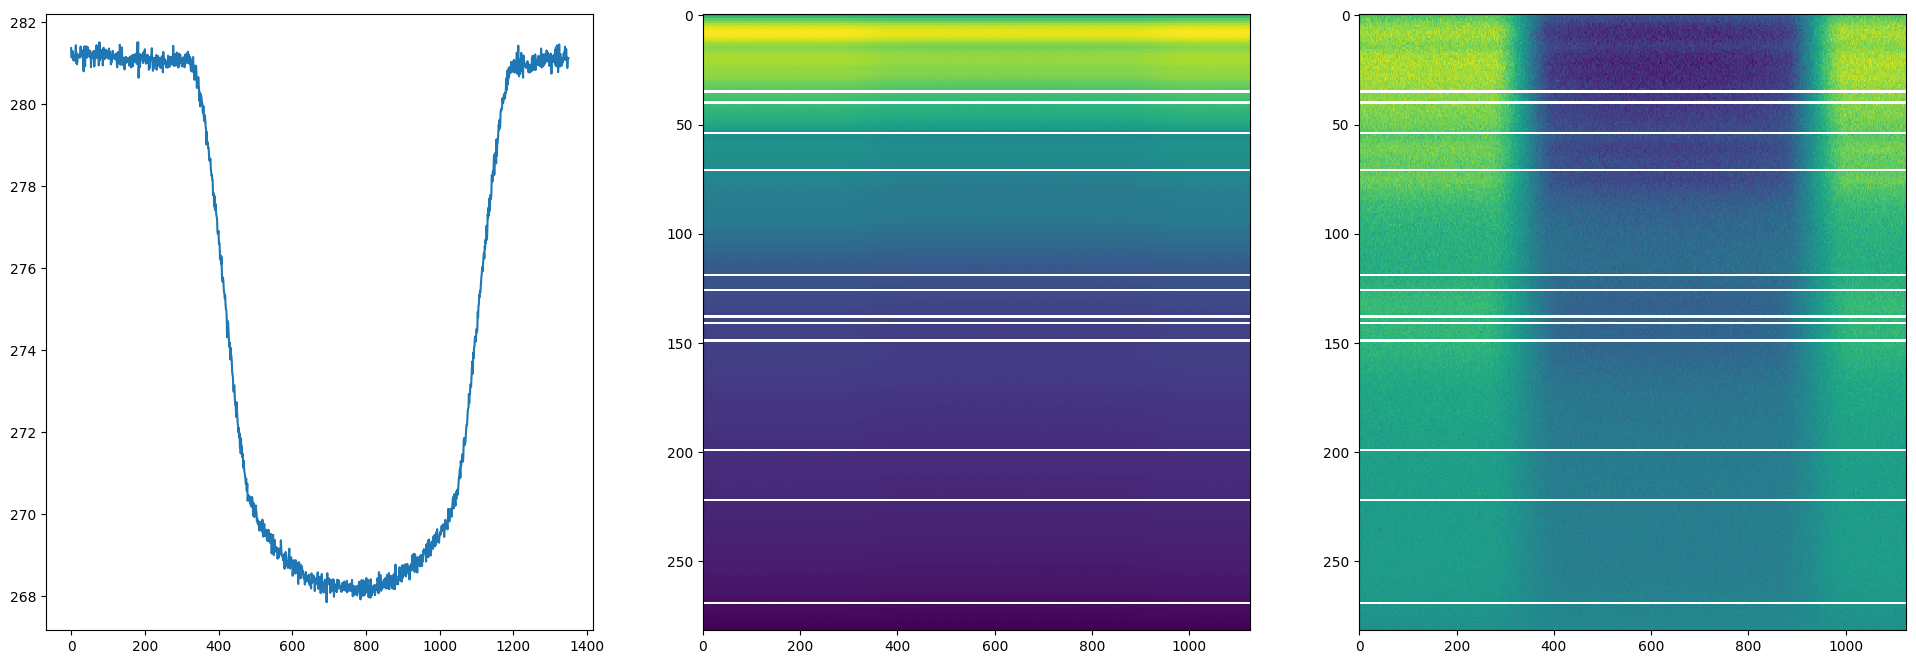

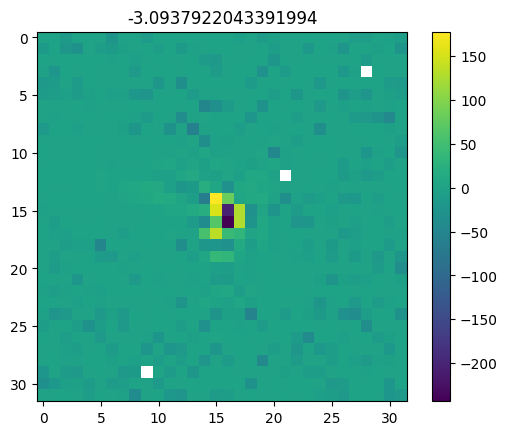

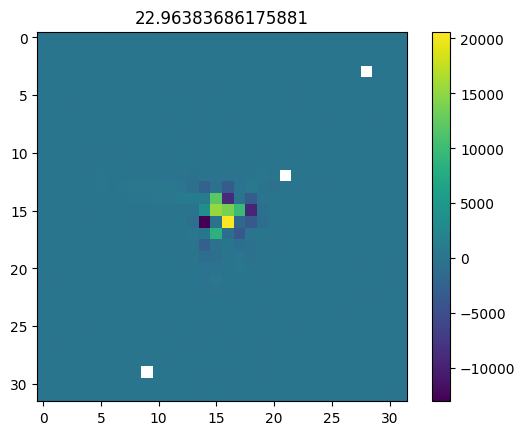

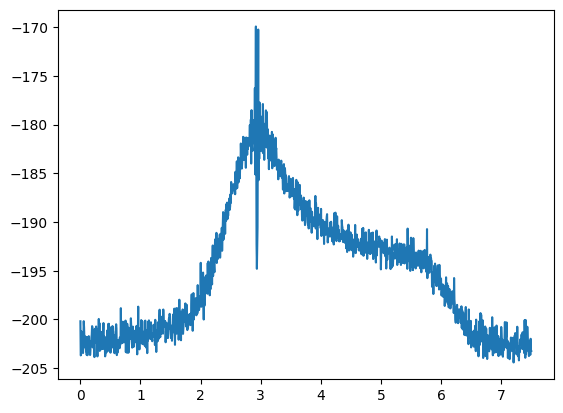

In [ ]:
import ariel_load
import ariel_load_FGS
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
#d.transits = d.transits[1:]
#d.transits[0].observation_number = 1
ariel_load.raw_data_diagnostics(copy.deepcopy(d), 0, loaders)

In [ ]:
%debug

In [ ]:
d.diagnostics['